In [35]:


%store -r  X
%store -r  y

%store -r  x_train
%store -r  x_test

%store -r  y_train
%store  -r y_test

%store -r col_trans

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


In [37]:
X.select_dtypes('object')

,Gender,WritingPreference
0,Male,Right hand
1,Male,Left hand
2,Male,Left hand
3,Male,Right hand
4,Male,Right hand
5,Male,Right hand
6,Male,Right hand
7,Male,Right hand
8,Male,Right hand
9,Male,Left hand


In [38]:
cat = ['Gender', 'WritingPreference']


## 1. Logistic model
### Vanilla Logistic Model

In [39]:
opertaions = [('OneHotEncoder', col_trans),('Log',LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]
pip_log_model = Pipeline(steps=opertaions)


In [40]:
pip_log_model

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'WritingPreference'], dtype='object'))])),
                ('Log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [41]:
x_train.shape , y_train.shape

((4615, 98), (4615,))

In [42]:
pip_log_model.fit(x_train,y_train)


c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'WritingPreference'], dtype='object'))])),
                ('Log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [43]:
from sklearn.metrics import classification_report, confusion_matrix


def eval (model, x_train, y_train,x_test, y_test):
    y_train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [44]:
eval(pip_log_model, x_train ,y_train, x_test, y_test)

Test_Set
[[232  25   3]
 [ 12  93  31]
 [ 13 151 594]]
              precision    recall  f1-score   support

       Black       0.90      0.89      0.90       260
    Hispanic       0.35      0.68      0.46       136
       White       0.95      0.78      0.86       758

    accuracy                           0.80      1154
   macro avg       0.73      0.79      0.74      1154
weighted avg       0.87      0.80      0.82      1154


Train_Set
[[ 946   62   30]
 [  47  393  103]
 [  63  516 2455]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.90      1038
    Hispanic       0.40      0.72      0.52       543
       White       0.95      0.81      0.87      3034

    accuracy                           0.82      4615
   macro avg       0.75      0.81      0.77      4615
weighted avg       0.87      0.82      0.84      4615



In [45]:
# we see here the scores of Hispanic class is lower than other classes
# we get the insigh there is no overfitting .

## Cross Validation

In [46]:
from sklearn.model_selection import cross_validate

In [47]:
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score


scoring = {"precision_Hispanic" : make_scorer(precision_score, average=None, labels=["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average=None, labels=["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels=["Hispanic"])}


In [48]:
import pandas as pd


opertaions = [('OneHotEncoder', col_trans),('Log',LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]
model = Pipeline(steps=opertaions)

scores = cross_validate(model, x_train, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]


c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `spa

test_precision_Hispanic    0.371533
test_f1_Hispanic           0.477876
test_recall_Hispanic       0.672155
dtype: float64

In [49]:
import pandas as pd
pd.set_option('display.max_rows', None)


### Logistic Model GridsearchCV

In [50]:
pd.set_option('display.max_columns', None)

pip_log_model.get_params()

{'memory': None,
 'steps': [('OneHotEncoder',
   ColumnTransformer(remainder=MinMaxScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    Index(['Gender', 'WritingPreference'], dtype='object'))])),
  ('Log',
   LogisticRegression(class_weight='balanced', max_iter=10000, random_state=101))],
 'verbose': False,
 'OneHotEncoder': ColumnTransformer(remainder=MinMaxScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  Index(['Gender', 'WritingPreference'], dtype='object'))]),
 'Log': LogisticRegression(class_weight='balanced', max_iter=10000, random_state=101),
 'OneHotEncoder__n_jobs': None,
 'OneHotEncoder__remainder__clip': False,
 '

In [51]:
from sklearn.model_selection import GridSearchCV
# operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

opertaions = [('OneHotEncoder', col_trans),
              ('Log',LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=opertaions)

penality = [ 'l2']
C = [1, 5, 10]
solver = ['liblinear', 'lbfgs']
class_weight = ["balanced", None]


#I got tow error here when i set parameters 
# ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.
# sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1', 'none' (deprecated)} or None. Got 'None' instead.

# ValueError: penalty='none' is not supported for the liblinear solver


In [52]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])


param_grid = {"Log__penalty" :penality ,
              "Log__C" : C,
              "Log__solver" : solver, 
              'Log__class_weight':class_weight }


In [53]:
grid_model1 = GridSearchCV(model,
                          param_grid,
                          cv=10,
                          scoring=recall_Hispanic,
                          n_jobs=-1,
                          return_train_score=True)

In [54]:
grid_model1.fit(x_train, y_train)

c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'WritingPreference'], dtype='object'))])),
                                       ('Log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'Log__C': [1, 5, 10],
                         'Log__class_weight': ['balanced', None],
                         'Log__penalty': ['l2'],
                         'Log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [55]:
grid_model1.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'WritingPreference'], dtype='object'))])),
                ('Log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [56]:
grid_model1.best_params_


{'Log__C': 1,
 'Log__class_weight': 'balanced',
 'Log__penalty': 'l2',
 'Log__solver': 'lbfgs'}

In [63]:
pd.DataFrame(grid_model1.cv_results_)[["mean_test_score", "mean_train_score","params"]]

,mean_test_score,mean_train_score,params
0,0.466027,0.499078,"{'Log__C': 1, 'Log__class_weight': 'balanced',..."
1,0.672155,0.721710,"{'Log__C': 1, 'Log__class_weight': 'balanced',..."
2,0.233838,0.243094,"{'Log__C': 1, 'Log__class_weight': None, 'Log_..."
3,0.307441,0.321055,"{'Log__C': 1, 'Log__class_weight': None, 'Log_..."
4,0.495421,0.537139,"{'Log__C': 5, 'Log__class_weight': 'balanced',..."
5,0.662963,0.724577,"{'Log__C': 5, 'Log__class_weight': 'balanced',..."
6,0.281717,0.309802,"{'Log__C': 5, 'Log__class_weight': None, 'Log_..."
7,0.347980,0.385102,"{'Log__C': 5, 'Log__class_weight': None, 'Log_..."
8,0.499125,0.548804,"{'Log__C': 10, 'Log__class_weight': 'balanced'..."
9,0.662963,0.727033,"{'Log__C': 10, 'Log__class_weight': 'balanced'..."


In [64]:
pd.DataFrame(grid_model1.cv_results_).loc[grid_model1.best_index_,["mean_test_score", "mean_train_score"]]

mean_test_score     0.672155
mean_train_score     0.72171
Name: 1, dtype: object

In [65]:
grid_model1.best_score_

0.6721548821548822

In [87]:
eval(grid_model1,x_train, y_train, x_test, y_test)

Test_Set
[[232  25   3]
 [ 12  93  31]
 [ 13 151 594]]
              precision    recall  f1-score   support

       Black       0.90      0.89      0.90       260
    Hispanic       0.35      0.68      0.46       136
       White       0.95      0.78      0.86       758

    accuracy                           0.80      1154
   macro avg       0.73      0.79      0.74      1154
weighted avg       0.87      0.80      0.82      1154


Train_Set
[[ 946   62   30]
 [  47  393  103]
 [  63  516 2455]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.90      1038
    Hispanic       0.40      0.72      0.52       543
       White       0.95      0.81      0.87      3034

    accuracy                           0.82      4615
   macro avg       0.75      0.81      0.77      4615
weighted avg       0.87      0.82      0.84      4615



c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


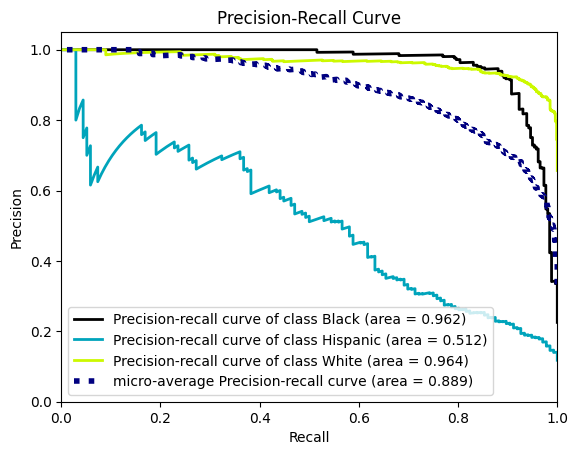

In [82]:
from matplotlib import pyplot as plt
from scikitplot.metrics import plot_roc, plot_precision_recall
opertaions = [('OneHotEncoder', col_trans),
              ('Log',LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=opertaions)
model.fit(x_train, y_train)


y_pred_proba = model.predict_proba(x_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [84]:
opertaions = [('OneHotEncoder', col_trans),
              ('Log',LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101,
                                         solver="liblinear",
                                         penalty="l1"))]

pip_log_model_libl = Pipeline(steps=opertaions)

In [85]:
pip_log_model_libl.fit(x_train,y_train)

c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'WritingPreference'], dtype='object'))])),
                ('Log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='liblinear'))])

In [86]:
eval(pip_log_model_libl,x_train, y_train, x_test, y_test)

Test_Set
[[237  14   9]
 [ 15  74  47]
 [ 14  50 694]]
              precision    recall  f1-score   support

       Black       0.89      0.91      0.90       260
    Hispanic       0.54      0.54      0.54       136
       White       0.93      0.92      0.92       758

    accuracy                           0.87      1154
   macro avg       0.78      0.79      0.79      1154
weighted avg       0.87      0.87      0.87      1154


Train_Set
[[ 965   22   51]
 [  63  278  202]
 [  60  180 2794]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91      1038
    Hispanic       0.58      0.51      0.54       543
       White       0.92      0.92      0.92      3034

    accuracy                           0.87      4615
   macro avg       0.79      0.79      0.79      4615
weighted avg       0.87      0.87      0.87      4615



In [89]:
opertaions = [
    ("OneHotEncode", col_trans), 
    (
        "Log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            solver="liblinear",
            penalty="l1",
        ),
    ),

]
model = Pipeline(steps=opertaions)



scores = cross_validate(model, x_train, y_train, scoring=scoring, cv=10, n_jobs=-1,return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.549307
train_precision_Hispanic    0.586907
test_f1_Hispanic            0.506369
train_f1_Hispanic           0.550322
test_recall_Hispanic        0.473333
train_recall_Hispanic       0.518109
dtype: float64